In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


# Steps Undertaken 

* Got the data from API over a cron job
* After receving the data, modified the dataset to be more manageable 
* Received Time and Data, grouped them by address
* Heatmap over a period of time on maps grouped by location 
* 
* 
* 

In [3]:
Data = pd.read_csv(r"FinalData.csv")
DublinLocation = pd.read_csv(r"DublinLocationAddress.csv")

In [4]:
DublinLocation.head()

,Number,Name,Address,Latitude,Longitude
0,42,SMITHFIELD NORTH,Smithfield North,53.349562,-6.278198
1,30,PARNELL SQUARE NORTH,Parnell Square North,53.353462,-6.265305
2,54,CLONMEL STREET,Clonmel Street,53.336021,-6.262980
3,108,AVONDALE ROAD,Avondale Road,53.359405,-6.276142
4,56,MOUNT STREET LOWER,Mount Street Lower,53.337960,-6.241530


In [135]:
Data.shape

(317604, 11)

In [ ]:
d

In [6]:
Data.columns

Index(['STATION ID', 'TIME', 'LAST UPDATED', 'NAME', 'BIKE_STANDS',
       'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES', 'STATUS', 'ADDRESS',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [7]:
data = Data

data['TIME'] = pd.to_datetime(data['TIME'])
data_sorted = data.sort_values(by='TIME')

data_sorted['DATE'] = data_sorted['TIME'].dt.strftime('%Y-%m-%d')
data_sorted['TIME_ONLY'] = data_sorted['TIME'].dt.strftime('%H:%M:%S')

In [8]:
data_sorted = data_sorted.drop(columns=['LAST UPDATED','TIME'])
data_sorted.head()

,STATION ID,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY
0,1,CLARENDON ROW,31,10,21,OPEN,Clarendon Row,53.3409,-6.26250,2023-10-01,00:00:03
83,87,COLLINS BARRACKS MUSEUM,38,30,8,OPEN,Collins Barracks Museum,53.3475,-6.28525,2023-10-01,00:00:03
82,86,PARKGATE STREET,38,14,24,OPEN,Parkgate Street,53.3480,-6.29180,2023-10-01,00:00:03
81,85,ROTHE ABBEY,35,18,17,OPEN,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:00:03
80,84,BROOKFIELD ROAD,30,10,20,OPEN,Brookfield Road,53.3390,-6.30022,2023-10-01,00:00:03


In [9]:
data_sorted = data_sorted.drop(columns=['STATUS'])
data_sorted

,STATION ID,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY
0,1,CLARENDON ROW,31,10,21,Clarendon Row,53.3409,-6.26250,2023-10-01,00:00:03
83,87,COLLINS BARRACKS MUSEUM,38,30,8,Collins Barracks Museum,53.3475,-6.28525,2023-10-01,00:00:03
82,86,PARKGATE STREET,38,14,24,Parkgate Street,53.3480,-6.29180,2023-10-01,00:00:03
81,85,ROTHE ABBEY,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:00:03
80,84,BROOKFIELD ROAD,30,10,20,Brookfield Road,53.3390,-6.30022,2023-10-01,00:00:03
...,...,...,...,...,...,...,...,...,...,...
317521,32,PEARSE STREET,30,30,0,Pearse Street,53.3443,-6.25043,2023-11-28,00:30:02
317520,31,PARNELL STREET,20,10,10,Parnell Street,53.3509,-6.26512,2023-11-28,00:30:02
317519,30,PARNELL SQUARE NORTH,20,12,8,Parnell Square North,53.3535,-6.26531,2023-11-28,00:30:02
317516,27,MOLESWORTH STREET,20,20,0,Molesworth Street,53.3413,-6.25812,2023-11-28,00:30:02


In [10]:
data_sorted= data_sorted.drop(columns="NAME")
data_sorted.head()

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY
0,1,31,10,21,Clarendon Row,53.3409,-6.26250,2023-10-01,00:00:03
83,87,38,30,8,Collins Barracks Museum,53.3475,-6.28525,2023-10-01,00:00:03
82,86,38,14,24,Parkgate Street,53.3480,-6.29180,2023-10-01,00:00:03
81,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:00:03
80,84,30,10,20,Brookfield Road,53.3390,-6.30022,2023-10-01,00:00:03


## Grouping Data by the address 

In [11]:
data_sorted[data_sorted['ADDRESS']=="Rothe Abbey"].head(-40)

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY
81,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:00:03
195,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:30:03
309,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,01:00:03
423,85,35,17,18,Rothe Abbey,53.3388,-6.30395,2023-10-01,01:30:03
537,85,35,17,18,Rothe Abbey,53.3388,-6.30395,2023-10-01,02:00:03
...,...,...,...,...,...,...,...,...,...
312555,85,35,31,4,Rothe Abbey,53.3388,-6.30395,2023-11-27,02:30:03
312669,85,35,31,4,Rothe Abbey,53.3388,-6.30395,2023-11-27,03:00:03
312783,85,35,31,4,Rothe Abbey,53.3388,-6.30395,2023-11-27,03:30:02
312897,85,35,31,4,Rothe Abbey,53.3388,-6.30395,2023-11-27,04:00:02


In [13]:
data = data_sorted

grouped_data = data.groupby('ADDRESS').agg({
    'AVAILABLE_BIKES': 'sum',
    'AVAILABLE_BIKE_STANDS': 'sum',
    'ADDRESS': 'count'
}).rename(columns={'ADDRESS': 'FREQUENCY'})

grouped_data.head()

,AVAILABLE_BIKES,AVAILABLE_BIKE_STANDS,FREQUENCY
ADDRESS,,,
Avondale Road,30583,66803,2786
Benson Street,32937,78201,2786
Blackhall Place,28880,54633,2786
Blessington Street,14046,41645,2786
Bolton Street,22240,33413,2786


In [14]:
grouped_data

,AVAILABLE_BIKES,AVAILABLE_BIKE_STANDS,FREQUENCY
ADDRESS,,,
Avondale Road,30583,66803,2786
Benson Street,32937,78201,2786
Blackhall Place,28880,54633,2786
Blessington Street,14046,41645,2786
Bolton Street,22240,33413,2786
...,...,...,...
Wilton Terrace,16105,39545,2786
Wilton Terrace (Park),34494,76401,2786
Wolfe Tone Street,36530,44080,2786


In [15]:
sd_clarendonRoad = data_sorted[data_sorted["ADDRESS"]=="Clarendon Row"]

In [16]:
mean_bikes = sd_clarendonRoad['AVAILABLE_BIKES'].mean()

sd_clarendonRoad['sd_bike'] = (sd_clarendonRoad['AVAILABLE_BIKES'] - mean_bikes).abs()

sd_clarendonRoad


C:\Users\ayush\miniconda3\envs\VisionEnv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,sd_bike
0,1,31,10,21,Clarendon Row,53.3409,-6.2625,2023-10-01,00:00:03,4.293252
114,1,31,11,20,Clarendon Row,53.3409,-6.2625,2023-10-01,00:30:03,3.293252
228,1,31,11,20,Clarendon Row,53.3409,-6.2625,2023-10-01,01:00:03,3.293252
342,1,31,11,20,Clarendon Row,53.3409,-6.2625,2023-10-01,01:30:03,3.293252
456,1,31,11,20,Clarendon Row,53.3409,-6.2625,2023-10-01,02:00:03,3.293252
...,...,...,...,...,...,...,...,...,...,...
317034,1,31,22,9,Clarendon Row,53.3409,-6.2625,2023-11-27,22:30:03,7.706748
317148,1,31,21,10,Clarendon Row,53.3409,-6.2625,2023-11-27,23:00:03,6.706748
317262,1,31,21,10,Clarendon Row,53.3409,-6.2625,2023-11-27,23:30:02,6.706748
317376,1,31,21,10,Clarendon Row,53.3409,-6.2625,2023-11-28,00:00:03,6.706748


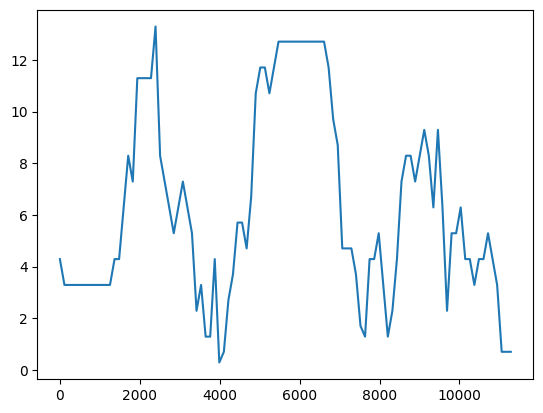

In [17]:
plt.plot(sd_clarendonRoad['sd_bike'][:100])

In [18]:
data_sorted.columns

Index(['STATION ID', 'BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES',
       'ADDRESS', 'LATITUDE', 'LONGITUDE', 'DATE', 'TIME_ONLY'],
      dtype='object')

In [19]:
data_sorted["ADDRESS"].value_counts()

Clarendon Row               2786
Mountjoy Square West        2786
Sir Patrick's Dun           2786
Blessington Street          2786
Bolton Street               2786
                            ... 
Merrion Square South        2786
Wilton Terrace (Park)       2786
Killarney Street            2786
Broadstone                  2786
St. Stephen's Green East    2786
Name: ADDRESS, Length: 114, dtype: int64

# TIME GROUP 

In [20]:

data = data_sorted

data['DATE'] = pd.to_datetime(data['DATE'])

def categorize_date_group(date):
    if date >= pd.Timestamp('2023-10-01') and date <= pd.Timestamp('2023-10-15'):
        return 'Date_group1'
    elif date >= pd.Timestamp('2023-10-16') and date <= pd.Timestamp('2023-10-31'):
        return 'Date_group2'
    elif date >= pd.Timestamp('2023-11-01') and date <= pd.Timestamp('2023-11-14'):
        return 'Date_group3'
    else:
        return 'Date_group4'

def categorize_time_group(time_str):
    hour = int(time_str.split(':')[0])  
    if 8 <= hour < 16:  
        return 'Morning'
    elif 16 <= hour < 24: 
        return 'Evening'
    else:  # 
        return 'Night'

data['DATE_GROUP'] = data['DATE'].apply(categorize_date_group)
data['TIME_GROUP'] = data['TIME_ONLY'].apply(categorize_time_group)

data

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,DATE_GROUP,TIME_GROUP
0,1,31,10,21,Clarendon Row,53.3409,-6.26250,2023-10-01,00:00:03,Date_group1,Night
83,87,38,30,8,Collins Barracks Museum,53.3475,-6.28525,2023-10-01,00:00:03,Date_group1,Night
82,86,38,14,24,Parkgate Street,53.3480,-6.29180,2023-10-01,00:00:03,Date_group1,Night
81,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:00:03,Date_group1,Night
80,84,30,10,20,Brookfield Road,53.3390,-6.30022,2023-10-01,00:00:03,Date_group1,Night
...,...,...,...,...,...,...,...,...,...,...,...
317521,32,30,30,0,Pearse Street,53.3443,-6.25043,2023-11-28,00:30:02,Date_group4,Night
317520,31,20,10,10,Parnell Street,53.3509,-6.26512,2023-11-28,00:30:02,Date_group4,Night
317519,30,20,12,8,Parnell Square North,53.3535,-6.26531,2023-11-28,00:30:02,Date_group4,Night
317516,27,20,20,0,Molesworth Street,53.3413,-6.25812,2023-11-28,00:30:02,Date_group4,Night


In [21]:
DateTimeGrouping = data

In [22]:
DateTimeGrouping["ADDRESS"].unique()

array(['Clarendon Row', 'Collins Barracks Museum', 'Parkgate Street',
       'Rothe Abbey', 'Brookfield Road', 'Emmet Road', 'Mount Brown',
       'St James Hospital (Luas)', 'Eccles Street East', 'Mater Hospital',
       'Wolfe Tone Street', 'Market Street South', 'James Street',
       'Oliver Bond Street', 'Francis Street', 'John Street West',
       'Kevin Street', 'Grand Canal Dock', 'Hanover Quay', 'The Point',
       'New Central Bank', 'Convention Centre', 'Sandwith Street',
       'Fenian Street', 'Lime Street', 'Hardwicke Place',
       'Blackhall Place', 'North Circular Road', 'Benson Street',
       'Heuston Bridge (North)', 'Hanover Quay East', 'Broadstone',
       'Killarney Street', 'Wilton Terrace (Park)',
       'Merrion Square South', "North Circular Road (O'Connell's)",
       'Mountjoy Square East', 'Phibsborough Road',
       'Buckingham Street Lower', 'Avondale Road', 'Charleville Road',
       'Rathdown Road', 'Grangegorman Lower (North)',
       'Grangegorman Lo

In [23]:
DateTimeGrouping["TIME_GROUP"].value_counts()

Night      106248
Morning    105678
Evening    105678
Name: TIME_GROUP, dtype: int64

In [24]:
DateTimeGrouping[DateTimeGrouping["DATE_GROUP"]=="Date_group1"]

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,DATE_GROUP,TIME_GROUP
0,1,31,10,21,Clarendon Row,53.3409,-6.26250,2023-10-01,00:00:03,Date_group1,Night
83,87,38,30,8,Collins Barracks Museum,53.3475,-6.28525,2023-10-01,00:00:03,Date_group1,Night
82,86,38,14,24,Parkgate Street,53.3480,-6.29180,2023-10-01,00:00:03,Date_group1,Night
81,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,00:00:03,Date_group1,Night
80,84,30,10,20,Brookfield Road,53.3390,-6.30022,2023-10-01,00:00:03,Date_group1,Night
...,...,...,...,...,...,...,...,...,...,...,...
81889,38,40,17,23,Talbot Street,53.3510,-6.25294,2023-10-15,23:30:02,Date_group1,Evening
81890,39,20,13,7,Wilton Terrace,53.3324,-6.25272,2023-10-15,23:30:02,Date_group1,Evening
81891,40,21,4,17,Jervis Street,53.3483,-6.26665,2023-10-15,23:30:02,Date_group1,Evening
81892,41,20,16,4,Harcourt Terrace,53.3328,-6.25794,2023-10-15,23:30:02,Date_group1,Evening


In [25]:
filtered_group = DateTimeGrouping[
    (DateTimeGrouping['DATE_GROUP'] == "Date_group1") & 
    (DateTimeGrouping['ADDRESS'] == "Blessington Street") 
]

filtered_group

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,DATE_GROUP,TIME_GROUP
1,2,20,11,9,Blessington Street,53.3568,-6.26814,2023-10-01,00:00:03,Date_group1,Night
115,2,20,9,11,Blessington Street,53.3568,-6.26814,2023-10-01,00:30:03,Date_group1,Night
229,2,20,10,10,Blessington Street,53.3568,-6.26814,2023-10-01,01:00:03,Date_group1,Night
343,2,20,10,10,Blessington Street,53.3568,-6.26814,2023-10-01,01:30:03,Date_group1,Night
457,2,20,10,10,Blessington Street,53.3568,-6.26814,2023-10-01,02:00:03,Date_group1,Night
...,...,...,...,...,...,...,...,...,...,...,...
81397,2,20,11,9,Blessington Street,53.3568,-6.26814,2023-10-15,21:30:03,Date_group1,Evening
81511,2,20,11,9,Blessington Street,53.3568,-6.26814,2023-10-15,22:00:03,Date_group1,Evening
81625,2,20,9,11,Blessington Street,53.3568,-6.26814,2023-10-15,22:30:02,Date_group1,Evening
81739,2,20,8,12,Blessington Street,53.3568,-6.26814,2023-10-15,23:00:02,Date_group1,Evening


In [26]:
import pandas as pd
import folium
from ipywidgets import interact, IntSlider, ToggleButtons
import datetime
from IPython.display import display 

data = DateTimeGrouping  

data['TIME_ONLY'] = pd.to_datetime(data['TIME_ONLY'])

filtered_group = data[
    (data['DATE_GROUP'] == "Date_group1") & 
    (data['ADDRESS'] == "Blessington Street")
]

def update_map(hour, time_group):
    # Filter data based on selected hour and time group
    specific_time_data = filtered_group[
        (filtered_group['TIME_GROUP'] == time_group) &
        (filtered_group['TIME_ONLY'].dt.hour == hour)
    ]

    # Create a map
    folium_map = folium.Map(location=[53.349805, -6.260310], zoom_start=15)  

    # Add markers
    for _, row in specific_time_data.iterrows():
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=10,
            fill=True,
            fill_color='#3186cc' if row['AVAILABLE_BIKES'] > 0 else '#ff0000',
            color=None,
            fill_opacity=0.7
        ).add_to(folium_map)

    return folium_map._repr_html_()  

interact(update_map,
         hour=IntSlider(min=0, max=23, step=1, value=12),
         time_group=ToggleButtons(options=['Morning', 'Evening', 'Night'])
        )

def save_map(hour, time_group, file_name):
    # Filter data based on selected hour and time group
    specific_time_data = filtered_group[
        (filtered_group['TIME_GROUP'] == time_group) &
        (filtered_group['TIME_ONLY'].dt.hour == hour)
    ]

    folium_map = folium.Map(location=[53.349805, -6.260310], zoom_start=15)

    for _, row in specific_time_data.iterrows():
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=10,
            fill=True,
            fill_color='#3186cc' if row['AVAILABLE_BIKES'] > 0 else '#ff0000',
            color=None,
            fill_opacity=0.7
        ).add_to(folium_map)

        
    display(folium_map)

save_map(12, 'Morning', 'dublin_bike_map.html')

interactive(children=(IntSlider(value=12, description='hour', max=23), ToggleButtons(description='time_group',…

In [27]:
DateTimeGrouping[DateTimeGrouping["DATE_GROUP"]=="Date_group1"]

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,DATE_GROUP,TIME_GROUP
0,1,31,10,21,Clarendon Row,53.3409,-6.26250,2023-10-01,2023-11-29 00:00:03,Date_group1,Night
83,87,38,30,8,Collins Barracks Museum,53.3475,-6.28525,2023-10-01,2023-11-29 00:00:03,Date_group1,Night
82,86,38,14,24,Parkgate Street,53.3480,-6.29180,2023-10-01,2023-11-29 00:00:03,Date_group1,Night
81,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01,2023-11-29 00:00:03,Date_group1,Night
80,84,30,10,20,Brookfield Road,53.3390,-6.30022,2023-10-01,2023-11-29 00:00:03,Date_group1,Night
...,...,...,...,...,...,...,...,...,...,...,...
81889,38,40,17,23,Talbot Street,53.3510,-6.25294,2023-10-15,2023-11-29 23:30:02,Date_group1,Evening
81890,39,20,13,7,Wilton Terrace,53.3324,-6.25272,2023-10-15,2023-11-29 23:30:02,Date_group1,Evening
81891,40,21,4,17,Jervis Street,53.3483,-6.26665,2023-10-15,2023-11-29 23:30:02,Date_group1,Evening
81892,41,20,16,4,Harcourt Terrace,53.3328,-6.25794,2023-10-15,2023-11-29 23:30:02,Date_group1,Evening


In [28]:
#grouby address 

In [29]:
import pandas as pd

bikes_data = DateTimeGrouping


grouped_data = bikes_data.groupby('ADDRESS').agg({
    'STATION ID': 'first',
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'AVAILABLE_BIKE_STANDS': 'mean',
    'AVAILABLE_BIKES': 'mean'
}).reset_index()

grouped_data.head(114) 


,ADDRESS,STATION ID,LATITUDE,LONGITUDE,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES
0,Avondale Road,108,53.3594,-6.27614,23.978105,10.977387
1,Benson Street,90,53.3442,-6.23345,28.069275,11.822326
2,Blackhall Place,88,53.3488,-6.28164,19.609835,10.366116
3,Blessington Street,2,53.3568,-6.26814,14.947954,5.041637
4,Bolton Street,3,53.3512,-6.26986,11.993180,7.982771
...,...,...,...,...,...,...
109,Wilton Terrace,39,53.3324,-6.25272,14.194185,5.780689
110,Wilton Terrace (Park),114,53.3337,-6.24834,27.423187,12.381192
111,Wolfe Tone Street,77,53.3489,-6.26746,15.821967,13.111989
112,York Street East,52,53.3388,-6.26200,17.628859,14.343862


In [30]:
grouped_data[grouped_data["ADDRESS"]=="Blessington Street"]

,ADDRESS,STATION ID,LATITUDE,LONGITUDE,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES
3,Blessington Street,2,53.3568,-6.26814,14.947954,5.041637


In [108]:
noise_data = pd.read_json(r"Blessington_noise.json")
noise_data

,date,start_time,end_time,laeq,limit_level,breach
0,2023-10-02,2023-11-29 00:00:00,2023-11-29 23:59:00,69.8,0,0
1,2023-10-02,2023-11-29 23:00:00,2023-11-29 07:00:00,84.4,0,0
2,2023-10-03,2023-11-29 00:00:00,2023-11-29 23:59:00,82.5,0,0
3,2023-10-03,2023-11-29 23:00:00,2023-11-29 07:00:00,80.0,0,0
4,2023-10-04,2023-11-29 00:00:00,2023-11-29 23:59:00,76.2,0,0
...,...,...,...,...,...,...
109,2023-11-25,2023-11-29 23:00:00,2023-11-29 07:00:00,45.7,0,0
110,2023-11-26,2023-11-29 00:00:00,2023-11-29 23:59:00,58.4,0,0
111,2023-11-26,2023-11-29 23:00:00,2023-11-29 07:00:00,60.2,0,0
112,2023-11-27,2023-11-29 00:00:00,2023-11-29 23:59:00,62.9,0,0


In [38]:
import pandas as pd
import folium
from folium.plugins import HeatMap

bikes_data = DateTimeGrouping

bike_data_filtered = bikes_data[
    (bikes_data['DATE_GROUP'] == 'Date_group1') & (bikes_data['TIME_GROUP'] == 'Evening')
]

grouped_bikes = bike_data_filtered.groupby(['LATITUDE', 'LONGITUDE']).agg({
    'AVAILABLE_BIKES': 'mean'
}).reset_index()

noise_data = noise_data

noise_data_filtered = noise_data[noise_data['DATE_GROUP'] == 'Date_group1']
avg_noise_level = noise_data_filtered['SoundLevel(dB)'].mean()

dublin_coordinates = (53.3498, -6.2603)  # Dublin City Center coordinates
map_dublin = folium.Map(location=dublin_coordinates, zoom_start=13)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['AVAILABLE_BIKES']] for index, row in grouped_bikes.iterrows()]
HeatMap(heat_data).add_to(map_dublin)

folium.Marker(
    [53.3568, -6.26814],
    popup=f'Average Evening Noise Level (Date Group 1): {avg_noise_level:.2f} dB',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(map_dublin)
map_dublin



KeyError: 'DATE_GROUP'

In [39]:
DateTimeGrouping["TIME_GROUP"].unique()


array(['Night', 'Morning', 'Evening'], dtype=object)

Mean Squared Error: 93.41916494716949


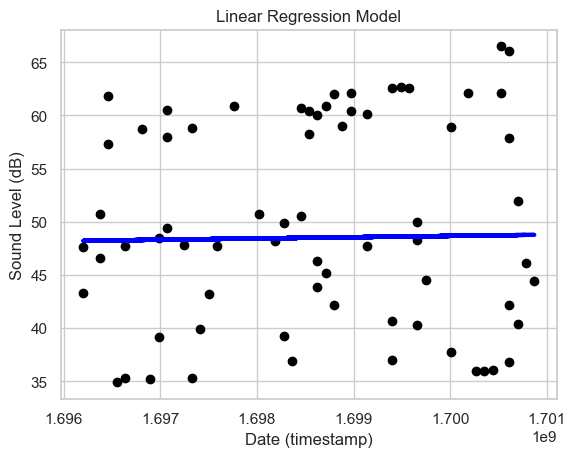

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_csv(file_path)

blessington = load_data('BlessingtonNoise.csv')
chancery_park = load_data('ChanceryParkNoise.csv')
drumcondra_library = load_data('DrumcondraLibraryNoise.csv')
wood_stock_gardens = load_data('WoodStockGardensNoise.csv')

combined_data = pd.concat([blessington, chancery_park, drumcondra_library, wood_stock_gardens])

combined_data['DATE'] = pd.to_datetime(combined_data['DATE'], errors='coerce')
combined_data = combined_data.dropna(subset=['DATE'])
combined_data['DATE'] = combined_data['DATE'].apply(lambda x: x.timestamp())

X = combined_data[['DATE']]  
y = combined_data['SoundLevel(dB)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Date (timestamp)')
plt.ylabel('Sound Level (dB)')
plt.title('Linear Regression Model')
plt.show()


Mean Squared Error: 93.86998145634456


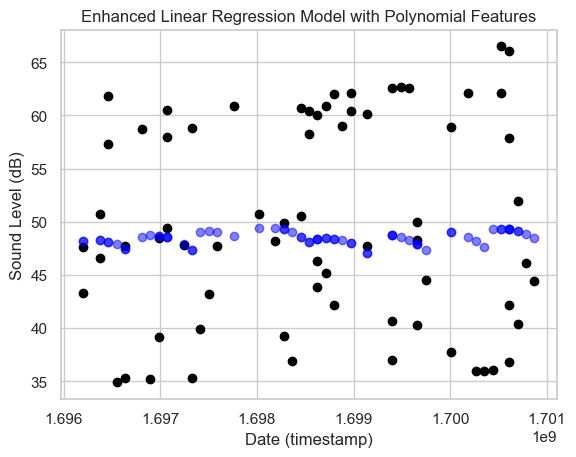

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime

def load_data(file_path):
    return pd.read_csv(file_path)


combined_data['DayOfWeek'] = combined_data['DATE'].apply(lambda x: datetime.fromtimestamp(x).weekday())
combined_data['HourOfDay'] = combined_data['DATE'].apply(lambda x: datetime.fromtimestamp(x).hour)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(combined_data[['DATE', 'DayOfWeek', 'HourOfDay']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

plt.scatter(X_test[:, 1], y_test, color='black')  # Plotting only against the original DATE feature
plt.scatter(X_test[:, 1], y_pred, color='blue', alpha=0.5)
plt.xlabel('Date (timestamp)')
plt.ylabel('Sound Level (dB)')
plt.title('Enhanced Linear Regression Model with Polynomial Features')
plt.show()


In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Bikes.csv')

df['HOUR'] = pd.to_datetime(df['TIME_ONLY']).dt.hour

# Select features and target
X = df[['STATION ID', 'HOUR', 'LATITUDE', 'LONGITUDE']]
y = df['AVAILABLE_BIKE_STANDS']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"The Mean Squared Error of the model is: {mse}")


The Mean Squared Error of the model is: 58.197885378429156


In [143]:
df.head()

,Unnamed: 0,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,DATE_GROUP,TIME_GROUP
0,0,1,31,10,21,Clarendon Row,53.3409,-6.26250,2023-10-01 00:00:00,2023-11-28 00:00:03,Date_group1,Night
1,83,87,38,30,8,Collins Barracks Museum,53.3475,-6.28525,2023-10-01 00:00:00,2023-11-28 00:00:03,Date_group1,Night
2,82,86,38,14,24,Parkgate Street,53.3480,-6.29180,2023-10-01 00:00:00,2023-11-28 00:00:03,Date_group1,Night
3,81,85,35,18,17,Rothe Abbey,53.3388,-6.30395,2023-10-01 00:00:00,2023-11-28 00:00:03,Date_group1,Night
4,80,84,30,10,20,Brookfield Road,53.3390,-6.30022,2023-10-01 00:00:00,2023-11-28 00:00:03,Date_group1,Night


In [41]:
import pandas as pd
import folium
from folium.plugins import HeatMap


bike_data_filtered = DateTimeGrouping[
    (DateTimeGrouping['DATE_GROUP'] == 'Date_group1') & (DateTimeGrouping['TIME_GROUP'] == 'Night')
]

grouped_bikes = bike_data_filtered.groupby(['LATITUDE', 'LONGITUDE']).agg({
    'AVAILABLE_BIKES': 'mean'
}).reset_index()

dublin_coordinates = (53.3498, -6.2603)
map_dublin = folium.Map(location=dublin_coordinates, zoom_start=13)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['AVAILABLE_BIKES']] for index, row in grouped_bikes.iterrows()]
HeatMap(heat_data).add_to(map_dublin)

additional_locations = {
    'Chancery park': [53.346694, -6.272244],
    'DrumcondraLibrary': [53.369864, -6.258966],
    'WoodstockGardens': [53.323524, -6.247734],
    'Blessington': [53.3568, -6.26814]
}

for name, coords in additional_locations.items():
    location_noise_data = pd.read_csv(f'{name.replace(" ", "")}Noise.csv')  # Update with the correct file path
    avg_noise_level = location_noise_data[location_noise_data['DATE_GROUP'] == 'Date_group1']['SoundLevel(dB)'].mean()
    
    folium.Marker(
        location=coords,
        popup=f'{name}: Average Night Noise Level (Date Group 1): {avg_noise_level:.2f} dB',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map_dublin)

map_dublin.save('Dublin_Bikes_Heatmap_Date_group1_Night.html')  # Save the map to an HTML file
    
map_dublin


In [42]:
def generate_and_save_maps(data, noise_data_files, base_coordinates, location_coords):
    time_groups = ['Morning', 'Afternoon', 'Night']
    date_groups = ['Date_group1', 'Date_group2', 'Date_group3', 'Date_group4']

    for date_group in date_groups:
        for time_group in time_groups:
            current_data = data[
                (data['DATE_GROUP'] == date_group) & (data['TIME_GROUP'] == time_group)
            ]

            grouped_current = current_data.groupby(['LATITUDE', 'LONGITUDE']).agg({
                'AVAILABLE_BIKES': 'mean'
            }).reset_index()

            map_dublin = folium.Map(location=base_coordinates, zoom_start=13)

            heat_data = [
                [row['LATITUDE'], row['LONGITUDE'], row['AVAILABLE_BIKES']]
                for index, row in grouped_current.iterrows()
            ]
            HeatMap(heat_data).add_to(map_dublin)

            for location, coords in location_coords.items():
                noise_data = pd.read_csv(noise_data_files[location])
                noise_data_filtered = noise_data[
                    (noise_data['DATE_GROUP'] == date_group) & (noise_data['DATE_GROUP'] == time_group)
                ]
                avg_sound_level = noise_data_filtered['SoundLevel(dB)'].mean()
                folium.Marker(
                    location=coords,
                    popup=f'{location}: Avg Noise Level ({date_group} {time_group}): {avg_sound_level:.2f} dB',
                    icon=folium.Icon(color='red', icon='info-sign')
                ).add_to(map_dublin)

            filename = f'Dublin_bikes_heatmap_{date_group}_{time_group}.html'
            map_dublin.save(filename)
            print(f'Map saved as {filename}')
generate_and_save_maps(
    data=DateTimeGrouping,
    noise_data_files={
        'Chancery park': 'ChanceryParkNoise.csv',
        'DrumcondraLibrary': 'DrumcondraLibraryNoise.csv',
        'WoodstockGardens': 'WoodStockGardensNoise.csv',
        'Blessington': 'BlessingtonNoise.csv'
    },
    base_coordinates=(53.3498, -6.2603),
    location_coords={
        'Chancery park': [53.346694, -6.272244],
        'DrumcondraLibrary': [53.369864, -6.258966],
        'WoodstockGardens': [53.323524, -6.247734],
        'Blessington': [53.3568, -6.26814]
    }
)



Map saved as Dublin_bikes_heatmap_Date_group1_Morning.html
Map saved as Dublin_bikes_heatmap_Date_group1_Afternoon.html
Map saved as Dublin_bikes_heatmap_Date_group1_Night.html
Map saved as Dublin_bikes_heatmap_Date_group2_Morning.html
Map saved as Dublin_bikes_heatmap_Date_group2_Afternoon.html
Map saved as Dublin_bikes_heatmap_Date_group2_Night.html
Map saved as Dublin_bikes_heatmap_Date_group3_Morning.html
Map saved as Dublin_bikes_heatmap_Date_group3_Afternoon.html
Map saved as Dublin_bikes_heatmap_Date_group3_Night.html
Map saved as Dublin_bikes_heatmap_Date_group4_Morning.html
Map saved as Dublin_bikes_heatmap_Date_group4_Afternoon.html
Map saved as Dublin_bikes_heatmap_Date_group4_Night.html


In [43]:
noise_data

,date,start_time,end_time,laeq,limit_level,breach
0,2023-10-02,2023-11-29 00:00:00,2023-11-29 23:59:00,69.8,0,0
1,2023-10-02,2023-11-29 23:00:00,2023-11-29 07:00:00,84.4,0,0
2,2023-10-03,2023-11-29 00:00:00,2023-11-29 23:59:00,82.5,0,0
3,2023-10-03,2023-11-29 23:00:00,2023-11-29 07:00:00,80.0,0,0
4,2023-10-04,2023-11-29 00:00:00,2023-11-29 23:59:00,76.2,0,0
...,...,...,...,...,...,...
109,2023-11-25,2023-11-29 23:00:00,2023-11-29 07:00:00,45.7,0,0
110,2023-11-26,2023-11-29 00:00:00,2023-11-29 23:59:00,58.4,0,0
111,2023-11-26,2023-11-29 23:00:00,2023-11-29 07:00:00,60.2,0,0
112,2023-11-27,2023-11-29 00:00:00,2023-11-29 23:59:00,62.9,0,0


In [45]:
import pandas as pd

# Load the Dublin Bikes data
bikes_data = pd.read_csv('Bikes.csv')  

grouped_data = bikes_data.groupby('ADDRESS').agg({
    'STATION ID': 'first',
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'AVAILABLE_BIKE_STANDS': 'mean',
    'AVAILABLE_BIKES': 'mean'
}).reset_index()

grouped_data.head(114) 

,ADDRESS,STATION ID,LATITUDE,LONGITUDE,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES
0,Avondale Road,108,53.3594,-6.27614,23.978105,10.977387
1,Benson Street,90,53.3442,-6.23345,28.069275,11.822326
2,Blackhall Place,88,53.3488,-6.28164,19.609835,10.366116
3,Blessington Street,2,53.3568,-6.26814,14.947954,5.041637
4,Bolton Street,3,53.3512,-6.26986,11.993180,7.982771
...,...,...,...,...,...,...
109,Wilton Terrace,39,53.3324,-6.25272,14.194185,5.780689
110,Wilton Terrace (Park),114,53.3337,-6.24834,27.423187,12.381192
111,Wolfe Tone Street,77,53.3489,-6.26746,15.821967,13.111989
112,York Street East,52,53.3388,-6.26200,17.628859,14.343862


# Heatmap

In [46]:
import pandas as pd

bikes_data = DateTimeGrouping

filtered_data = bikes_data[(bikes_data['DATE_GROUP'] == 'Date_group1') & (bikes_data['TIME_GROUP'] == 'Evening')]


In [47]:
grouped_data = filtered_data.groupby(['LATITUDE', 'LONGITUDE'])['AVAILABLE_BIKES'].mean().reset_index()


In [48]:
import folium
from folium.plugins import HeatMap

dublin_coordinates = (53.3498, -6.2603)
map_dublin = folium.Map(location=dublin_coordinates, zoom_start=13)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['AVAILABLE_BIKES']] for index, row in grouped_data.iterrows()]
HeatMap(heat_data).add_to(map_dublin)

map_dublin

map_dublin.save('dublin_bikes_heatmap_evening_group1.html')


In [49]:
# Group4 morning 

In [50]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from branca.element import Template, MacroElement

bikes_data = DateTimeGrouping

morning_data_group4 = bikes_data[
    (bikes_data['TIME_GROUP'] == 'Morning') & 
    (bikes_data['DATE_GROUP'] == 'Date_group4')
]

location_bike_availability = morning_data_group4.groupby(['LATITUDE', 'LONGITUDE']).agg({
    'AVAILABLE_BIKES': 'mean'
}).reset_index()

dublin_coordinates = (53.3498, -6.2603)
map_dublin = folium.Map(location=dublin_coordinates, zoom_start=13)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['AVAILABLE_BIKES']] 
             for index, row in location_bike_availability.iterrows()]
HeatMap(heat_data).add_to(map_dublin)

legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Cool Legend <br>
     &nbsp; High availability &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
     &nbsp; Low availability &nbsp; <i class="fa fa-circle" style="color:green"></i>
</div>
'''

legend = MacroElement()
legend._template = Template(legend_html)
map_dublin.get_root().add_child(legend)

map_dublin.save('dublin_bikes_heatmap_morning_group4.html')

map_dublin

In [51]:
data_sorted[data_sorted["DATE"]=='2023-11-02']

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE,DATE,TIME_ONLY,DATE_GROUP,TIME_GROUP
175301,87,38,23,15,Collins Barracks Museum,53.3475,-6.28525,2023-11-02,2023-11-29 00:00:03,Date_group3,Night
175292,77,29,23,6,Wolfe Tone Street,53.3489,-6.26746,2023-11-02,2023-11-29 00:00:03,Date_group3,Night
175293,78,40,30,10,Mater Hospital,53.3600,-6.26483,2023-11-02,2023-11-29 00:00:03,Date_group3,Night
175294,79,27,27,0,Eccles Street East,53.3581,-6.26560,2023-11-02,2023-11-29 00:00:03,Date_group3,Night
175295,80,40,14,26,St James Hospital (Luas),53.3414,-6.29295,2023-11-02,2023-11-29 00:00:03,Date_group3,Night
...,...,...,...,...,...,...,...,...,...,...,...
180609,34,30,10,20,Portobello Harbour,53.3304,-6.26516,2023-11-02,2023-11-29 23:30:03,Date_group3,Evening
180608,33,23,15,7,Princes Street / O'Connell Street,53.3490,-6.26031,2023-11-02,2023-11-29 23:30:03,Date_group3,Evening
180607,32,30,21,9,Pearse Street,53.3443,-6.25043,2023-11-02,2023-11-29 23:30:03,Date_group3,Evening
180616,41,20,13,7,Harcourt Terrace,53.3328,-6.25794,2023-11-02,2023-11-29 23:30:03,Date_group3,Evening


In [52]:
grouped_by_address = data_sorted.groupby('ADDRESS').mean()

grouped_by_address.reset_index(inplace=True)


grouped_by_address.head()


,ADDRESS,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE
0,Avondale Road,108.0,35.0,23.978105,10.977387,53.3594,-6.27614
1,Benson Street,90.0,40.0,28.069275,11.822326,53.3442,-6.23345
2,Blackhall Place,88.0,30.0,19.609835,10.366116,53.3488,-6.28164
3,Blessington Street,2.0,20.0,14.947954,5.041637,53.3568,-6.26814
4,Bolton Street,3.0,20.0,11.993180,7.982771,53.3512,-6.26986


In [53]:
address_frequency = data_sorted['ADDRESS'].value_counts().rename('FREQUENCY')

grouped_by_address_with_freq = grouped_by_address.join(address_frequency, on='ADDRESS')



grouped_by_address_with_freq.head()


,ADDRESS,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE,FREQUENCY
0,Avondale Road,108.0,35.0,23.978105,10.977387,53.3594,-6.27614,2786
1,Benson Street,90.0,40.0,28.069275,11.822326,53.3442,-6.23345,2786
2,Blackhall Place,88.0,30.0,19.609835,10.366116,53.3488,-6.28164,2786
3,Blessington Street,2.0,20.0,14.947954,5.041637,53.3568,-6.26814,2786
4,Bolton Street,3.0,20.0,11.993180,7.982771,53.3512,-6.26986,2786


# Working with the noise data: 

In [110]:
noise_data = pd.read_json(r"Blessington_noise.json")
noise_data


,date,start_time,end_time,laeq,limit_level,breach
0,2023-10-02,2023-11-29 00:00:00,2023-11-29 23:59:00,69.8,0,0
1,2023-10-02,2023-11-29 23:00:00,2023-11-29 07:00:00,84.4,0,0
2,2023-10-03,2023-11-29 00:00:00,2023-11-29 23:59:00,82.5,0,0
3,2023-10-03,2023-11-29 23:00:00,2023-11-29 07:00:00,80.0,0,0
4,2023-10-04,2023-11-29 00:00:00,2023-11-29 23:59:00,76.2,0,0
...,...,...,...,...,...,...
109,2023-11-25,2023-11-29 23:00:00,2023-11-29 07:00:00,45.7,0,0
110,2023-11-26,2023-11-29 00:00:00,2023-11-29 23:59:00,58.4,0,0
111,2023-11-26,2023-11-29 23:00:00,2023-11-29 07:00:00,60.2,0,0
112,2023-11-27,2023-11-29 00:00:00,2023-11-29 23:59:00,62.9,0,0


In [111]:
def categorize_date_group(date):
    if date >= pd.Timestamp('2023-10-01') and date <= pd.Timestamp('2023-10-15'):
        return 'Date_group1'
    elif date >= pd.Timestamp('2023-10-16') and date <= pd.Timestamp('2023-10-31'):
        return 'Date_group2'
    elif date >= pd.Timestamp('2023-11-01') and date <= pd.Timestamp('2023-11-14'):
        return 'Date_group3'
    else:
        return 'Date_group4'

noise_data['DATE_GROUP'] = noise_data['date'].apply(categorize_date_group)

noise_data["DATE_GROUP"].value_counts()

Date_group2    32
Date_group1    28
Date_group3    28
Date_group4    26
Name: DATE_GROUP, dtype: int64

In [112]:
noise_data = noise_data.drop(columns=["start_time","end_time"])
noise_data.head()
    

,date,laeq,limit_level,breach,DATE_GROUP
0,2023-10-02,69.8,0,0,Date_group1
1,2023-10-02,84.4,0,0,Date_group1
2,2023-10-03,82.5,0,0,Date_group1
3,2023-10-03,80.0,0,0,Date_group1
4,2023-10-04,76.2,0,0,Date_group1


In [113]:
noise_data = noise_data.drop(columns=["limit_level","breach"])
noise_data.head()

,date,laeq,DATE_GROUP
0,2023-10-02,69.8,Date_group1
1,2023-10-02,84.4,Date_group1
2,2023-10-03,82.5,Date_group1
3,2023-10-03,80.0,Date_group1
4,2023-10-04,76.2,Date_group1


In [114]:
noise_data["SoundLevel(dB)"] = noise_data["laeq"]
noise_data.head()

,date,laeq,DATE_GROUP,SoundLevel(dB)
0,2023-10-02,69.8,Date_group1,69.8
1,2023-10-02,84.4,Date_group1,84.4
2,2023-10-03,82.5,Date_group1,82.5
3,2023-10-03,80.0,Date_group1,80.0
4,2023-10-04,76.2,Date_group1,76.2


In [115]:
noise_data = noise_data.drop(columns=["laeq"])
noise_data.head()

,date,DATE_GROUP,SoundLevel(dB)
0,2023-10-02,Date_group1,69.8
1,2023-10-02,Date_group1,84.4
2,2023-10-03,Date_group1,82.5
3,2023-10-03,Date_group1,80.0
4,2023-10-04,Date_group1,76.2


In [116]:
noise_data.to_csv("BlessingtonNoise.csv")

In [117]:
noise_data["DATE"] = noise_data["laeq"]
noise_data.head()

KeyError: 'laeq'

In [118]:
noise_data = noise_data.drop(columns=["date"])
noise_data.head()

,DATE_GROUP,SoundLevel(dB)
0,Date_group1,69.8
1,Date_group1,84.4
2,Date_group1,82.5
3,Date_group1,80.0
4,Date_group1,76.2


In [119]:
noise_data.columns

Index(['DATE_GROUP', 'SoundLevel(dB)'], dtype='object')

In [120]:
# All noise files 

In [121]:
import pandas as pd
import os

json_files = [
    'DrumcondraLibraryNoise.json',
    'WoodStockGardensNoise.json',
    'ChanceryParkNoise.json'
]

def categorize_date_group(date):
    if date >= pd.Timestamp('2023-10-01') and date <= pd.Timestamp('2023-10-15'):
        return 'Date_group1'
    elif date >= pd.Timestamp('2023-10-16') and date <= pd.Timestamp('2023-10-31'):
        return 'Date_group2'
    elif date >= pd.Timestamp('2023-11-01') and date <= pd.Timestamp('2023-11-14'):
        return 'Date_group3'
    else:
        return 'Date_group4'

for file_name in json_files:
    noise_data = pd.read_json(file_name)
    
    noise_data['DATE_GROUP'] = noise_data['date'].apply(categorize_date_group)
    
    noise_data = noise_data.drop(columns=["start_time", "end_time", "limit_level", "breach"])
    
    noise_data.rename(columns={'date': 'DATE'}, inplace=True)
    noise_data['SoundLevel(dB)'] = noise_data['laeq']
    noise_data = noise_data.drop(columns=["laeq"])
    
    
    csv_file_name = file_name.replace('.json', '.csv')
    noise_data.to_csv(csv_file_name, index=False)
    
    print(noise_data.head())
    print(f"Processed data saved to {csv_file_name}")
    print(f"Columns: {noise_data.columns.tolist()}")
    print("-" * 50)


        DATE   DATE_GROUP  SoundLevel(dB)
0 2023-10-02  Date_group1            40.2
1 2023-10-02  Date_group1            35.3
2 2023-10-03  Date_group1            38.9
3 2023-10-03  Date_group1            34.6
4 2023-10-04  Date_group1            38.3
Processed data saved to DrumcondraLibraryNoise.csv
Columns: ['DATE', 'DATE_GROUP', 'SoundLevel(dB)']
--------------------------------------------------
        DATE   DATE_GROUP  SoundLevel(dB)
0 2023-10-02  Date_group1            47.6
1 2023-10-02  Date_group1            43.3
2 2023-10-03  Date_group1            51.1
3 2023-10-03  Date_group1            46.1
4 2023-10-04  Date_group1            50.7
Processed data saved to WoodStockGardensNoise.csv
Columns: ['DATE', 'DATE_GROUP', 'SoundLevel(dB)']
--------------------------------------------------
        DATE   DATE_GROUP  SoundLevel(dB)
0 2023-10-02  Date_group1            60.6
1 2023-10-02  Date_group1            59.3
2 2023-10-03  Date_group1            61.2
3 2023-10-03  Date_group1

# GPT models 

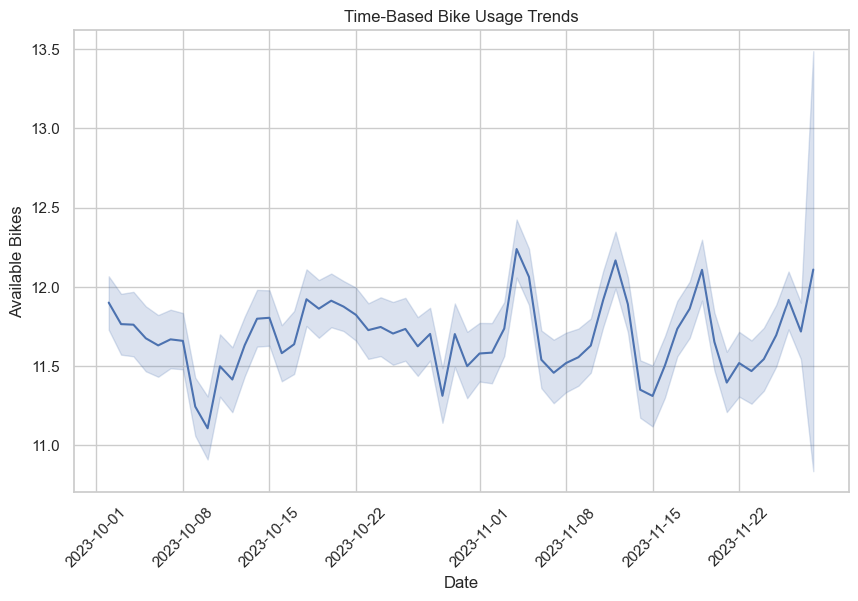

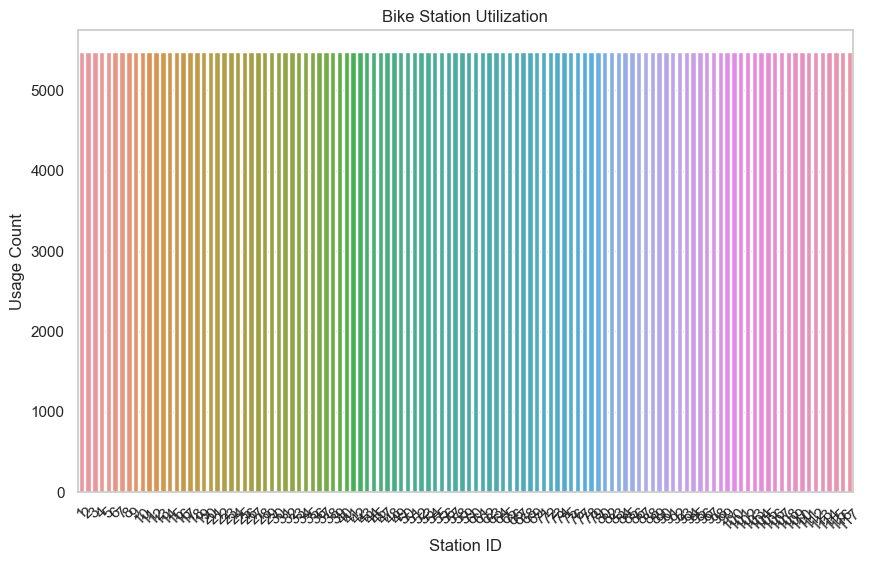

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bikes_data = DateTimeGrouping

noise_data = noise_data

combined_data = pd.merge(bikes_data, noise_data, on='DATE', how='inner')

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='DATE', y='AVAILABLE_BIKES')
plt.title('Time-Based Bike Usage Trends')
plt.xlabel('Date')
plt.ylabel('Available Bikes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='STATION ID')
plt.title('Bike Station Utilization')
plt.xlabel('Station ID')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()



# Assuming 'date' and 'AVAILABLE_BIKES' are columns in the bikes dataset
plt.figure(figsize=(10, 6))
sns.lineplot(data=bikes_data, x='DATE', y='AVAILABLE_BIKES')
plt.title('Time-Based Bike Usage Trends')
plt.xlabel('Date')
plt.ylabel('Available Bikes')
plt.xticks(rotation=45)
plt.show()


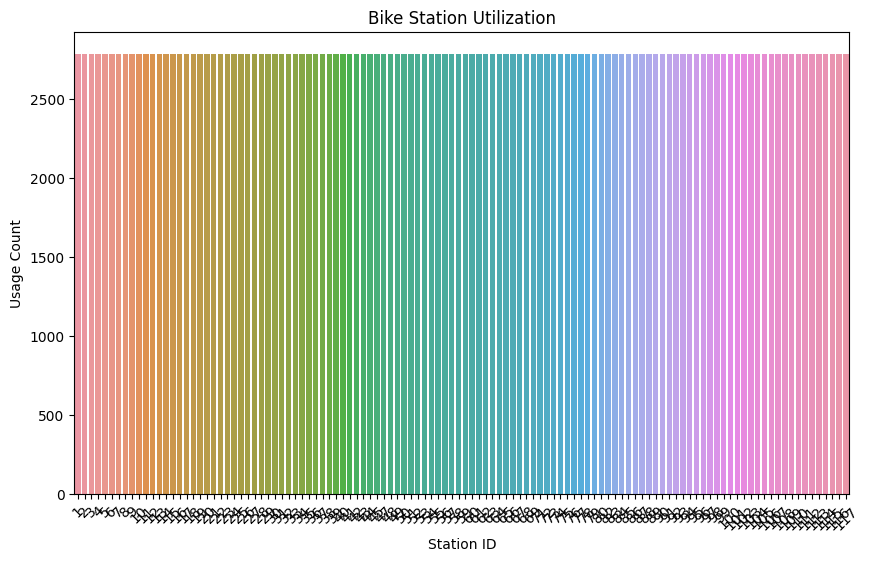

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bikes_data, x='STATION ID')
plt.title('Bike Station Utilization')
plt.xlabel('Station ID')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()


In [75]:
combined_data.to_csv("Combined_data.csv")

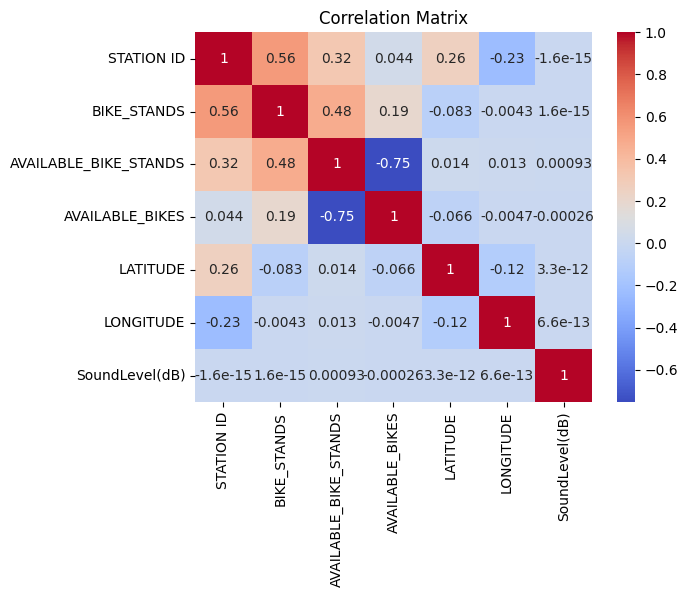

In [68]:

sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


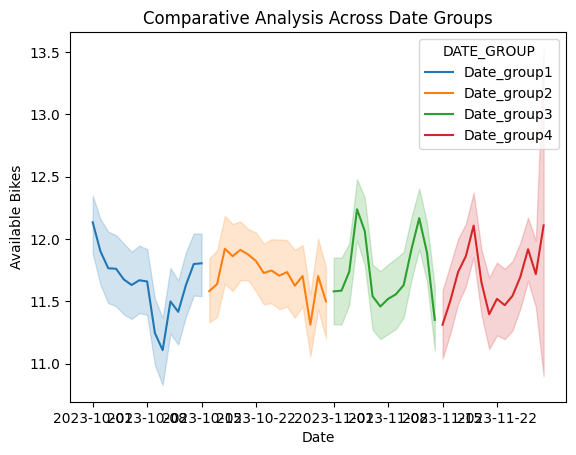

In [69]:
sns.lineplot(data=bikes_data, x='DATE', y='AVAILABLE_BIKES', hue='DATE_GROUP')
plt.title('Comparative Analysis Across Date Groups')
plt.xlabel('Date')
plt.ylabel('Available Bikes')
plt.show()


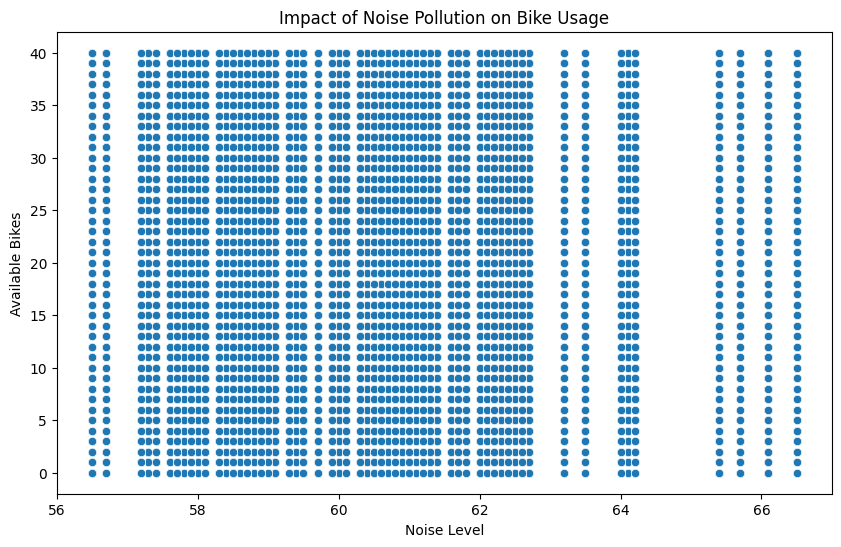

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='SoundLevel(dB)', y='AVAILABLE_BIKES')
plt.title('Impact of Noise Pollution on Bike Usage')
plt.xlabel('Noise Level')
plt.ylabel('Available Bikes')
plt.show()


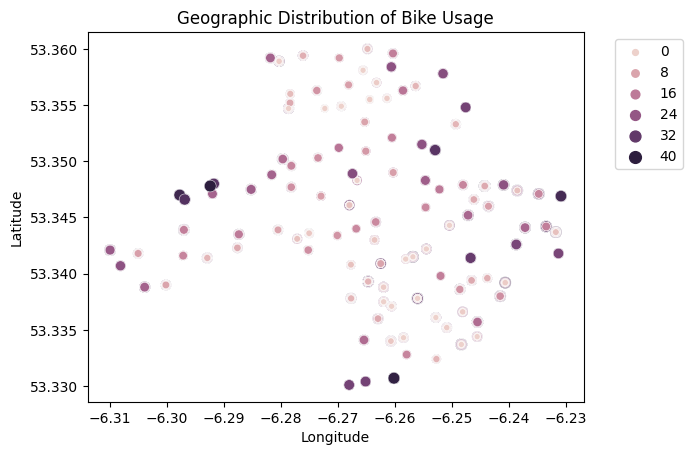

In [73]:
sns.scatterplot(data=bikes_data, x='LONGITUDE', y='LATITUDE', size='AVAILABLE_BIKES', hue='AVAILABLE_BIKES')
plt.title('Geographic Distribution of Bike Usage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

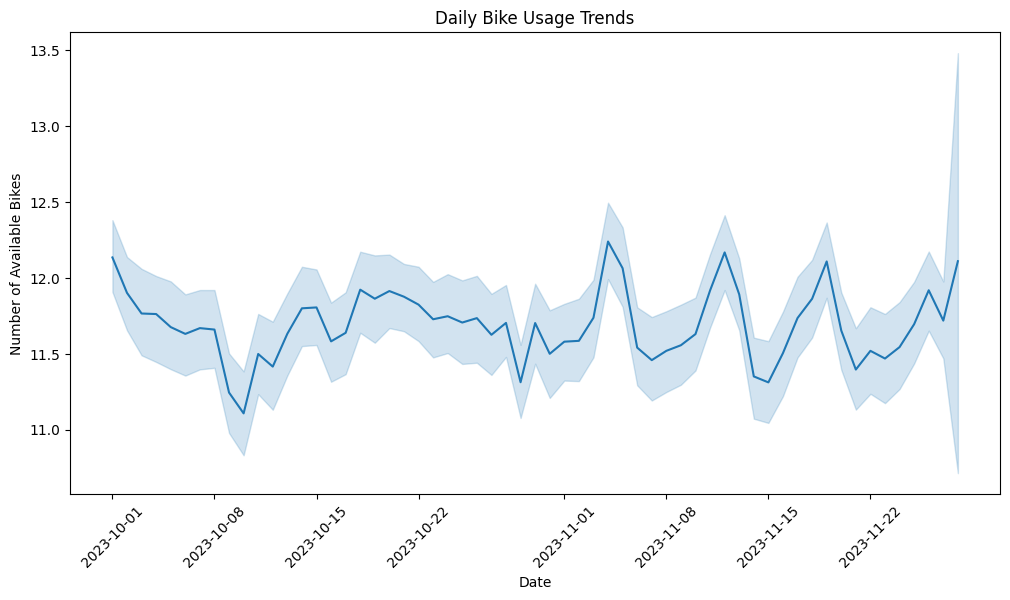

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=bikes_data, x='DATE', y='AVAILABLE_BIKES')
plt.title('Daily Bike Usage Trends')
plt.xlabel('Date')
plt.ylabel('Number of Available Bikes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pwd

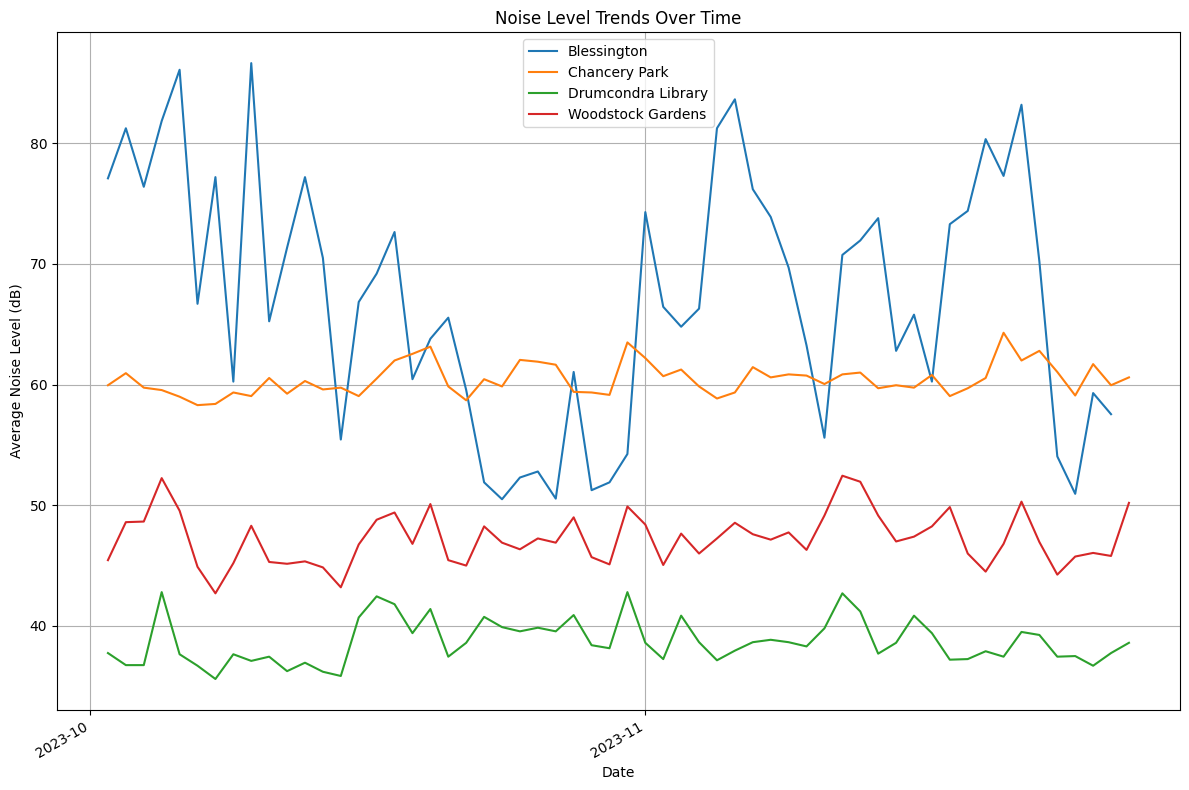

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    df.rename(columns=lambda x: x.strip(), inplace=True)  # Stripping whitespace from column names
    df['DATE'] = pd.to_datetime(df['DATE'] if 'DATE' in df.columns else df['date'])
    return df.groupby('DATE')['SoundLevel(dB)'].mean().reset_index()

blessington_df = load_and_preprocess('BlessingtonNoise.csv')
chancery_df = load_and_preprocess('ChanceryParkNoise.csv')
drumcondra_df = load_and_preprocess('DrumcondraLibraryNoise.csv')
woodstock_df = load_and_preprocess('WoodStockGardensNoise.csv')

plt.figure(figsize=(12, 8))
plt.plot(blessington_df['DATE'], blessington_df['SoundLevel(dB)'], label='Blessington')
plt.plot(chancery_df['DATE'], chancery_df['SoundLevel(dB)'], label='Chancery Park')
plt.plot(drumcondra_df['DATE'], drumcondra_df['SoundLevel(dB)'], label='Drumcondra Library')
plt.plot(woodstock_df['DATE'], woodstock_df['SoundLevel(dB)'], label='Woodstock Gardens')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for better representation of dates

plt.title('Noise Level Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Noise Level (dB)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # For a tight fit
plt.show()


In [77]:
common_dates = blessington_df['DATE'].isin(chancery_df['DATE']) & \
               blessington_df['DATE'].isin(drumcondra_df['DATE']) & \
               blessington_df['DATE'].isin(woodstock_df['DATE'])

common_blessington = blessington_df[common_dates]
common_chancery = chancery_df[chancery_df['DATE'].isin(common_blessington['DATE'])]
common_drumcondra = drumcondra_df[drumcondra_df['DATE'].isin(common_blessington['DATE'])]
common_woodstock = woodstock_df[woodstock_df['DATE'].isin(common_blessington['DATE'])]

mean_start_blessington = common_blessington.iloc[0]['SoundLevel(dB)']
mean_end_blessington = common_blessington.iloc[-1]['SoundLevel(dB)']
mean_start_chancery = common_chancery.iloc[0]['SoundLevel(dB)']
mean_end_chancery = common_chancery.iloc[-1]['SoundLevel(dB)']
mean_start_drumcondra = common_drumcondra.iloc[0]['SoundLevel(dB)']
mean_end_drumcondra = common_drumcondra.iloc[-1]['SoundLevel(dB)']
mean_start_woodstock = common_woodstock.iloc[0]['SoundLevel(dB)']
mean_end_woodstock = common_woodstock.iloc[-1]['SoundLevel(dB)']

change_blessington = mean_end_blessington - mean_start_blessington
change_chancery = mean_end_chancery - mean_start_chancery
change_drumcondra = mean_end_drumcondra - mean_start_drumcondra
change_woodstock = mean_end_woodstock - mean_start_woodstock

(change_blessington, change_chancery, change_drumcondra, change_woodstock)


(-19.549999999999997, 0.0, 0.0, 0.3499999999999943)

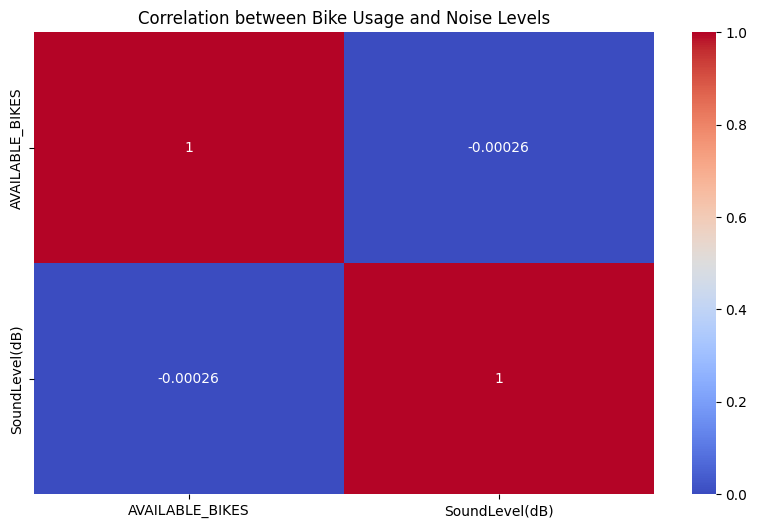

In [78]:
combined_data = pd.merge(bikes_data, noise_data, on='DATE', how='inner')

plt.figure(figsize=(10, 6))
sns.heatmap(combined_data[['AVAILABLE_BIKES', 'SoundLevel(dB)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Bike Usage and Noise Levels')
plt.show()


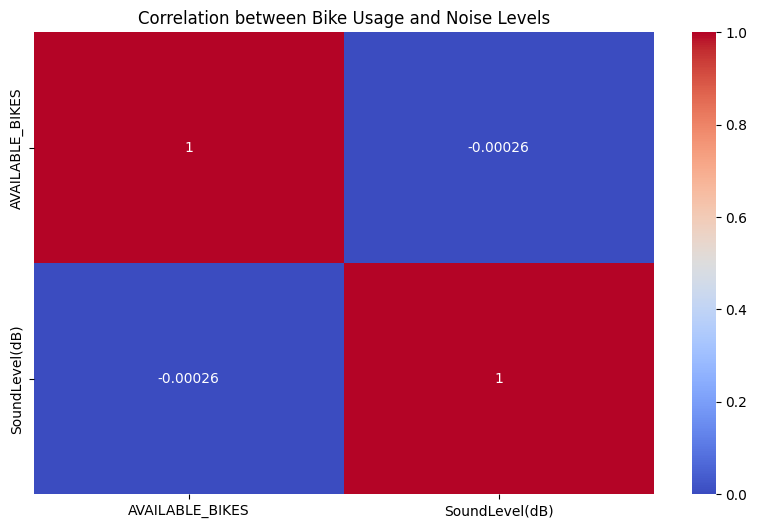

In [79]:
combined_data = pd.merge(bikes_data, noise_data, on='DATE', how='inner')

plt.figure(figsize=(10, 6))
sns.heatmap(combined_data[['AVAILABLE_BIKES', 'SoundLevel(dB)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Bike Usage and Noise Levels')
plt.show()


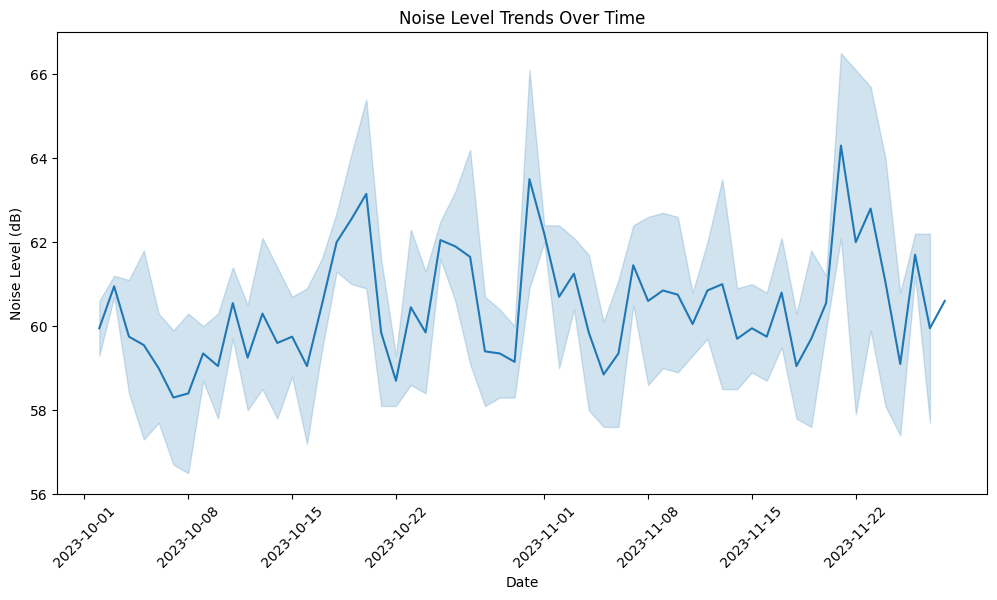

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=noise_data, x='DATE', y='SoundLevel(dB)')
plt.title('Noise Level Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Noise Level (dB)')
plt.xticks(rotation=45)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


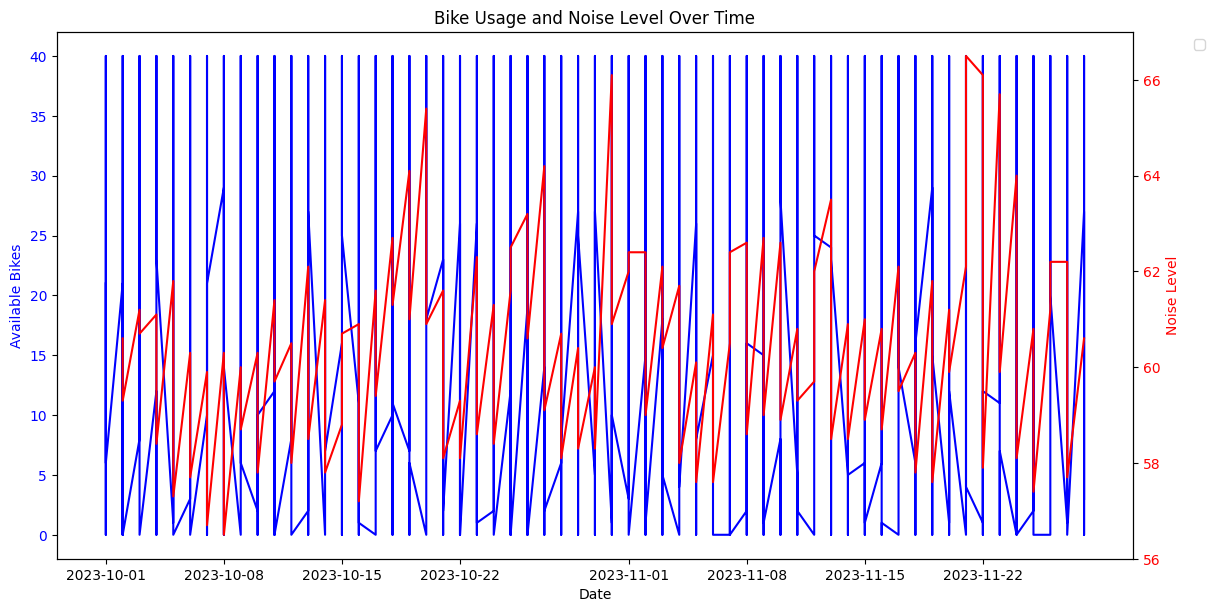

In [84]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Available Bikes', color=color)
ax1.plot(bikes_data['DATE'], bikes_data['AVAILABLE_BIKES'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Noise Level', color=color)  
ax2.plot(noise_data['DATE'], noise_data['SoundLevel(dB)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Bike Usage and Noise Level Over Time')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


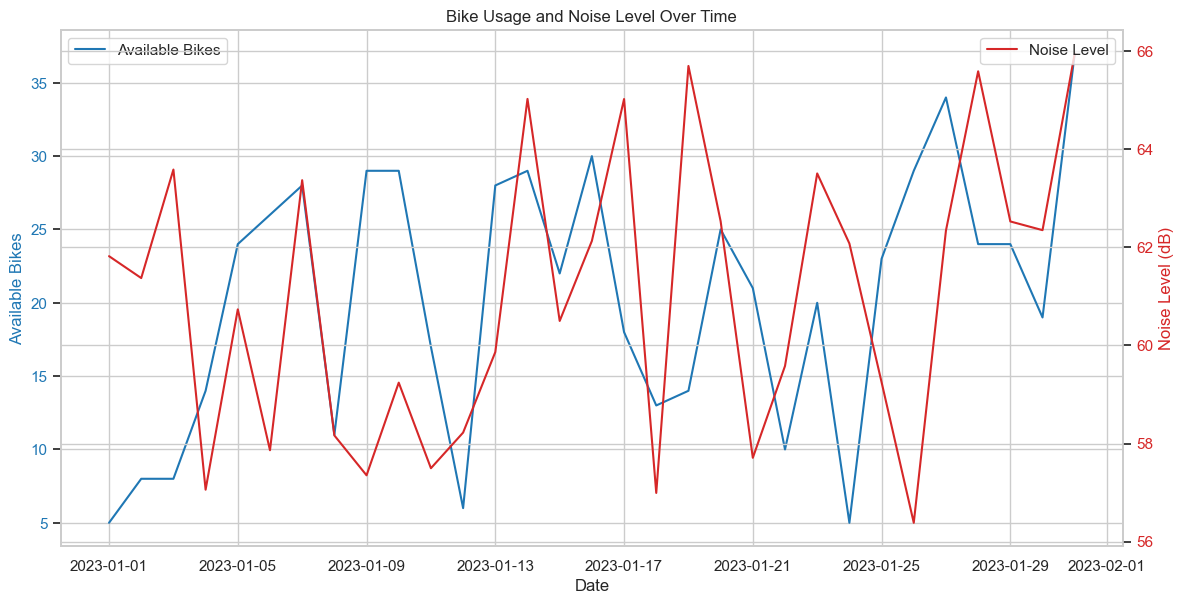

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
date_range = pd.date_range(start='2023-01-01', end='2023-01-31', freq='D')
available_bikes = np.random.randint(5, 40, size=len(date_range))
sound_level = np.random.uniform(56, 66, size=len(date_range))

bikes_data = pd.DataFrame({'DATE': date_range, 'AVAILABLE_BIKES': available_bikes})
noise_data = pd.DataFrame({'DATE': date_range, 'SoundLevel(dB)': sound_level})

bikes_data = bikes_data.sort_values('DATE')
noise_data = noise_data.sort_values('DATE')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Available Bikes', color=color)
ax1.plot(bikes_data['DATE'], bikes_data['AVAILABLE_BIKES'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Noise Level (dB)', color=color)  
ax2.plot(noise_data['DATE'], noise_data['SoundLevel(dB)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Bike Usage and Noise Level Over Time')

ax1.legend(['Available Bikes'], loc='upper left')
ax2.legend(['Noise Level'], loc='upper right')

plt.show()



# Corelatting the data between noise and bikes 

53.3572° N, 6.2707° W for blessington street basin noise 

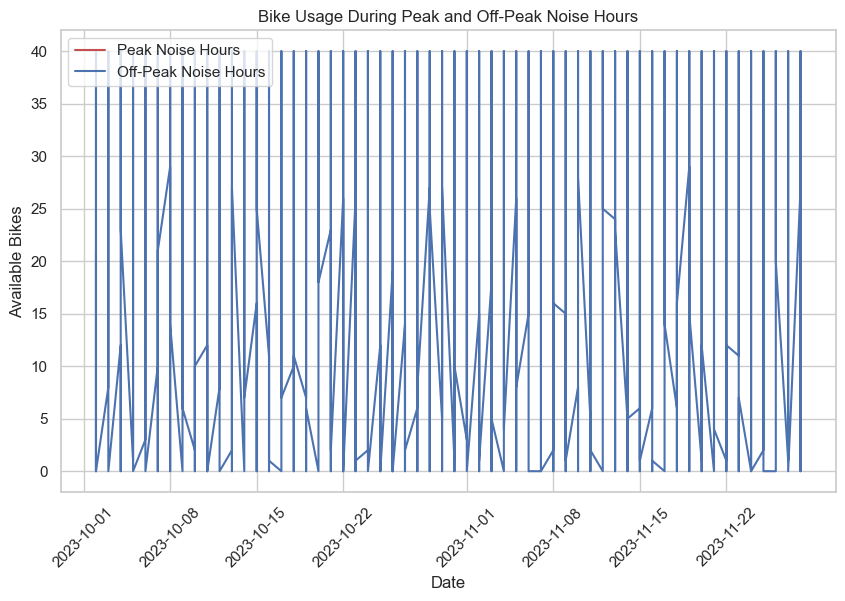

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

merged_data = merged_data

peak_hours = merged_data['DATE'].dt.hour.isin([7, 8, 16, 17])

plt.figure(figsize=(10, 6))

peak_data = merged_data[peak_hours]
plt.plot(peak_data['DATE'], peak_data['AVAILABLE_BIKES'], 'r-', label='Peak Noise Hours')

off_peak_data = merged_data[~peak_hours]
plt.plot(off_peak_data['DATE'], off_peak_data['AVAILABLE_BIKES'], 'b-', label='Off-Peak Noise Hours')

plt.xlabel('Date')
plt.ylabel('Available Bikes')
plt.title('Bike Usage During Peak and Off-Peak Noise Hours')
plt.legend()
plt.xticks(rotation=45)
plt.show()


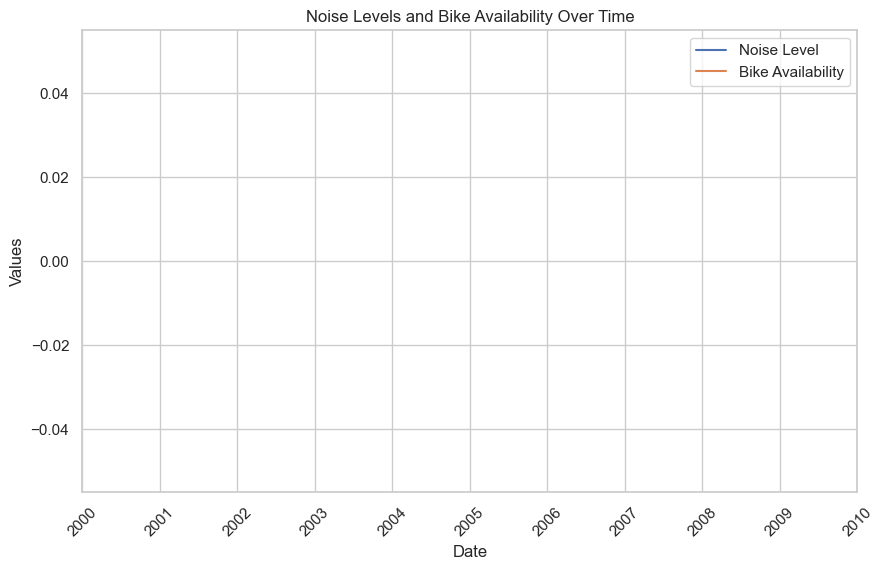

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

noise_df = noise_data
bikes_df = DateTimeGrouping

noise_df['DATE'] = pd.to_datetime(noise_df['DATE'])
bikes_df['DATE'] = pd.to_datetime(bikes_df['DATE'])

bikes_daily = bikes_df.groupby('DATE')['AVAILABLE_BIKES'].mean().reset_index()

merged_data = pd.merge(noise_df, bikes_daily, on='DATE', how='inner')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['DATE'], merged_data['SoundLevel(dB)'], label='Noise Level')
plt.plot(merged_data['DATE'], merged_data['AVAILABLE_BIKES'], label='Bike Availability')
plt.title('Noise Levels and Bike Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()


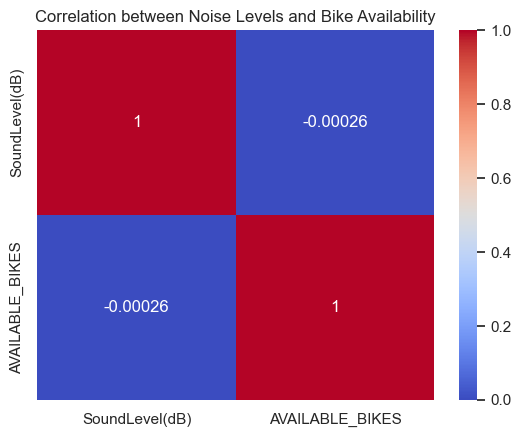

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation = merged_data[['SoundLevel(dB)', 'AVAILABLE_BIKES']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Noise Levels and Bike Availability')
plt.show()


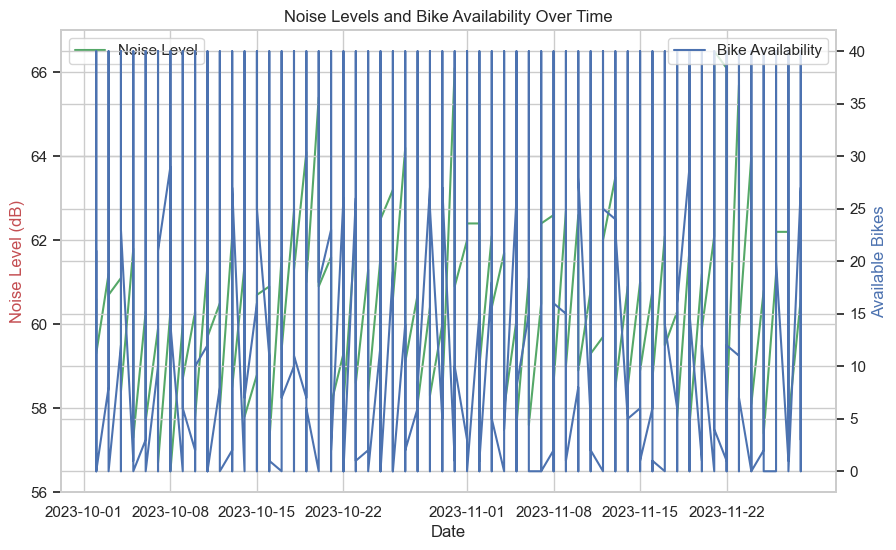

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

noise_df = noise_data
bikes_df = DateTimeGrouping

noise_df['DATE'] = pd.to_datetime(noise_df['DATE'])
bikes_df['DATE'] = pd.to_datetime(bikes_df['DATE'])

merged_data = pd.merge(noise_df, bikes_df, on='DATE')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.plot(merged_data['DATE'], merged_data['SoundLevel(dB)'], 'g-', label='Noise Level')
ax2.plot(merged_data['DATE'], merged_data['AVAILABLE_BIKES'], 'b-', label='Bike Availability')

ax1.set_xlabel('Date')
ax1.set_ylabel('Noise Level (dB)', color='r')
ax2.set_ylabel('Available Bikes', color='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Noise Levels and Bike Availability Over Time')
plt.show()


### Creating new file 

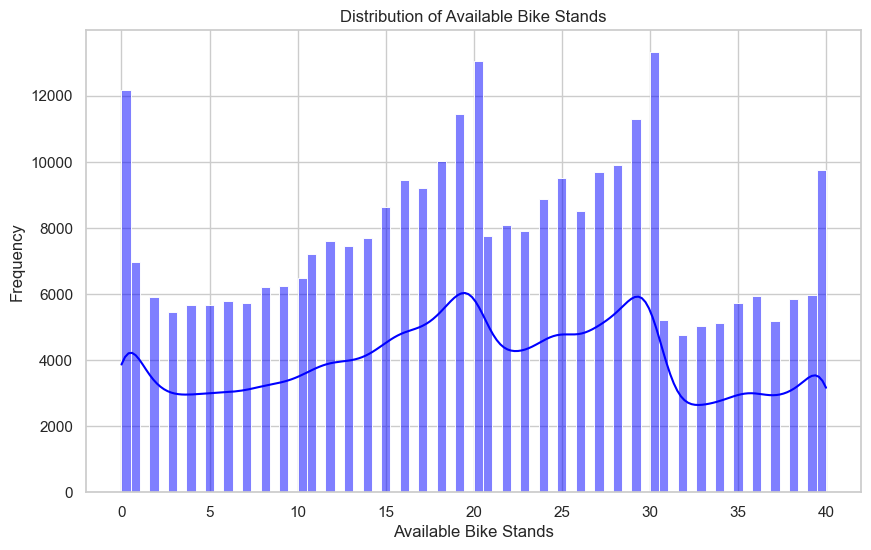

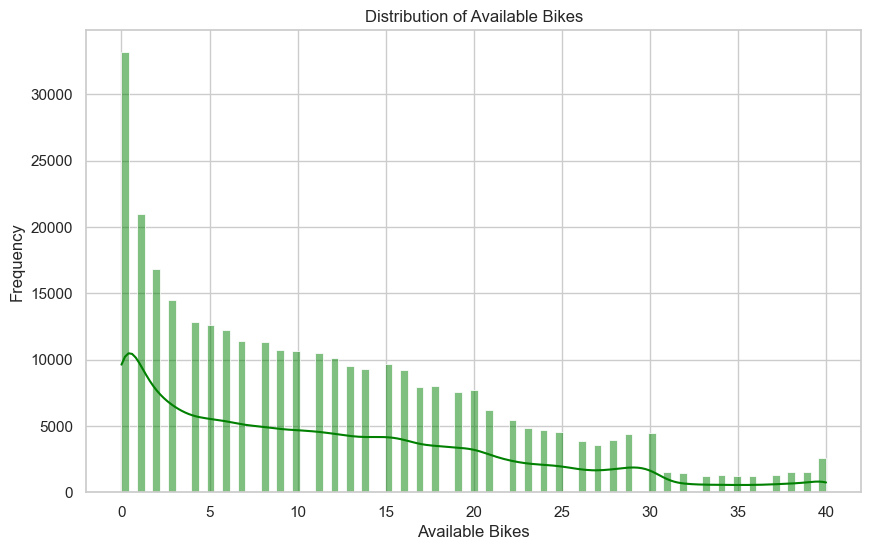

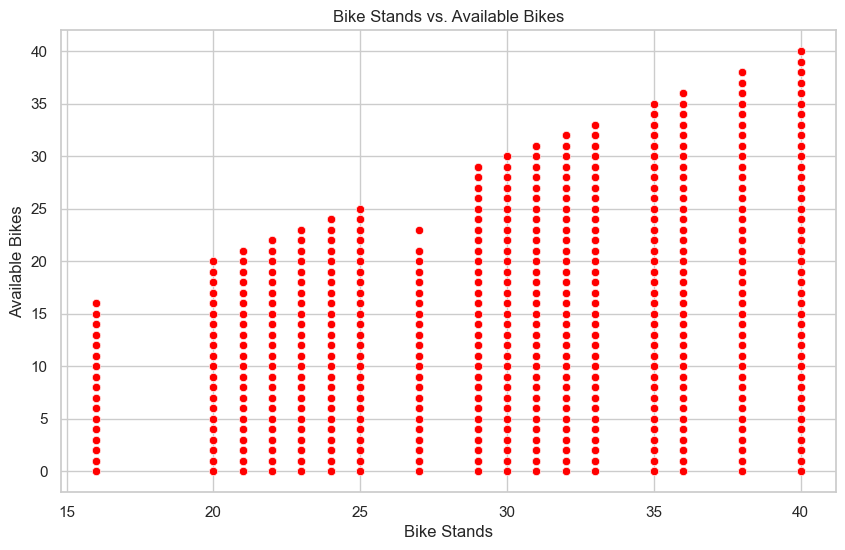

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(Data['AVAILABLE_BIKE_STANDS'], kde=True, color='blue')
plt.title('Distribution of Available Bike Stands')
plt.xlabel('Available Bike Stands')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(Data['AVAILABLE_BIKES'], kde=True, color='green')
plt.title('Distribution of Available Bikes')
plt.xlabel('Available Bikes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BIKE_STANDS', y='AVAILABLE_BIKES', data=Data, color='red')
plt.title('Bike Stands vs. Available Bikes')
plt.xlabel('Bike Stands')
plt.ylabel('Available Bikes')
plt.show()

# plt.figure(figsize=(12, 6))
# Data.set_index('TIME')['AVAILABLE_BIKES'].plot(color='purple')
# plt.title('Time Series of Available Bikes')
# plt.xlabel('Time')
# plt.ylabel('Available Bikes')
# plt.show()

# plt.figure(figsize=(15, 8))
# sns.boxplot(x='STATION ID', y='AVAILABLE_BIKES', data=Data)
# plt.title('Available Bikes by Station')
# plt.xlabel('Station ID')
# plt.ylabel('Available Bikes')
# plt.xticks(rotation=90)
# plt.show()

In [128]:
noise_data.iloc[1]


DATE              2023-10-02 00:00:00
DATE_GROUP                Date_group1
SoundLevel(dB)                   59.3
Name: 1, dtype: object

# Extra Features: 

In [131]:
blessington

,Unnamed: 0,date,DATE_GROUP,SoundLevel(dB)
0,0,2023-10-02,Date_group1,69.8
1,1,2023-10-02,Date_group1,84.4
2,2,2023-10-03,Date_group1,82.5
3,3,2023-10-03,Date_group1,80.0
4,4,2023-10-04,Date_group1,76.2
...,...,...,...,...
109,109,2023-11-25,Date_group4,45.7
110,110,2023-11-26,Date_group4,58.4
111,111,2023-11-26,Date_group4,60.2
112,112,2023-11-27,Date_group4,62.9


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_csv(file_path)

blessington = load_data('BlessingtonNoise.csv')
chancery_park = load_data('ChanceryParkNoise.csv')
drumcondra_library = load_data('DrumcondraLibraryNoise.csv')
wood_stock_gardens = load_data('WoodStockGardensNoise.csv')

combined_data = pd.concat([blessington, chancery_park, drumcondra_library, wood_stock_gardens])

combined_data['DATE'] = pd.to_datetime(combined_data['DATE'])
combined_data['DATE'] = combined_data['DATE'].map(pd.Timestamp.timestamp)

# Split data into features and target
X = combined_data[['DATE']]  # Features
y = combined_data['SoundLevel(dB)']  # Target


plt.xlabel('Date (timestamp)')
plt.ylabel('Sound Level (dB)')
plt.title('Linear Regression Model')
plt.show()


TypeError: descriptor 'timestamp' requires a 'pandas._libs.tslibs.timestamps._Timestamp' object but received a 'NaTType'